In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
# from pythonds.basic.stack import Stack
from math import *
import random
from sklearn.neighbors import KDTree
import random

In [2]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 20

# Number of survey (non-LRG) sources
survey = 1000

# Fake coordinates for LRG sources
random.seed(10)
x0 = [random.uniform(0,5) for j in range(lrg)]

random.seed(10)
y0 = [random.uniform(0,5) for j in range(lrg)]

y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra) = ", len(x0))
print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
x1 = [random.uniform(0,5) for j in range(survey)]

y1 = [random.uniform(0,5) for j in range(survey)]
    
print("length of fake survey sources (ra) = ", len(x1))
print("length of fake survey sources (dec) = ", len(y1))    

# Angular radius from LRG (in real code calculated using cosmocalc)
random.seed(10)
r = [random.uniform(0.002, 0.006) for j in range(lrg)]

print("length of array of projected distances from fake LRGs =", len(r))
print("max r = ", np.amax(r))
print("min r = ", np.amin(r))

# Redshift for LRG 
random.seed(10)
z = [random.uniform(0.1,0.5) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z))
print("max z = ", np.amax(z))
print("min z = ", np.amin(z))

# Magnitudes for survey sources
gmag_survey = [random.uniform(14,29) for j in range(survey)]
rmag_survey = [random.uniform(13,24) for j in range(survey)]
    
print("length of gmag for survey soruces =", len(gmag_survey))
print("length of rmag for survey soruces =", len(rmag_survey))
print("max gmag_survey = ", np.amax(gmag_survey))
print("min gmag_survey = ", np.amin(gmag_survey))
print("max rmag_survey = ", np.amax(rmag_survey))
print("min rmag_survey = ", np.amin(rmag_survey))

# Magnitudes for LRG sources
gmag_lrg = [random.uniform(17,23) for j in range(lrg)]
rmag_lrg = [random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag for survey soruces =", len(gmag_lrg))
print("length of rmag for survey soruces =", len(rmag_lrg))
print("max gmag_lrg = ", np.amax(gmag_lrg))
print("min gmag_lrg = ", np.amin(gmag_lrg))
print("max rmag_lrg = ", np.amax(rmag_lrg))
print("min rmag_lrg = ", np.amin(rmag_lrg))

# Make an array of the magnitudes of LRGs and survey sources; LRGs are first.
gmag_plus = np.concatenate([gmag_lrg, gmag_survey])
rmag_plus = np.concatenate([rmag_lrg, rmag_survey])

print("length of gmag_plus =", len(gmag_plus))
print("length of rmag_plus =", len(rmag_plus))

color_plus = gmag_plus - rmag_plus

print("length of color_plus = ", len(color_plus))
print("max color = ", np.amax(color_plus))
print("min color = ", np.amin(color_plus))

gmag_survey = np.array(gmag_survey)
rmag_survey = np.array(rmag_survey)
color_survey = gmag_survey - rmag_survey

print("length of color_survey = ", len(color_survey))

gmag_lrg = np.array(gmag_lrg)
rmag_lrg = np.array(rmag_lrg)
color_lrg = gmag_lrg - rmag_lrg

print("length of color_lrg = ", len(color_lrg))

# Make an array of the RA/Dec of LRGs and survey+ sources; LRGs are first.
x_all = np.concatenate([x0, x])
y_all = np.concatenate([y0, y])

print("length of x_all (ra) =", len(x_all))
print("length of y_all (dec) =", len(y_all))

# Make an array of the magnitudes of LRGs and survey+ sources; LRGs are first.
gmag_all = np.concatenate([gmag_lrg, gmag_plus])
rmag_all = np.concatenate([rmag_lrg, rmag_plus])

print("length of gmag_all =", len(gmag_all))
print("length of rmag_all =", len(rmag_all))

color_plus = gmag_plus - rmag_plus

print("length of color_all = ", len(color_all))

length of fake LRG sources (ra) =  20
length of fake LRG sources (dec) =  20
length of fake survey sources (ra) =  1000
length of fake survey sources (dec) =  1000
length of array of projected distances from fake LRGs = 20
max r =  0.00598622797016
min r =  0.0021782255298
length of array of redshifts for fake LRGs = 20
max z =  0.498622797016
min z =  0.11782255298
length of gmag for survey soruces = 1000
length of rmag for survey soruces = 1000
max gmag_survey =  28.99756949
min gmag_survey =  14.0083579271
max rmag_survey =  23.9832634534
min rmag_survey =  13.0050148634
length of gmag for survey soruces = 20
length of rmag for survey soruces = 20
max gmag_lrg =  22.7115590892
min gmag_lrg =  17.235363233
max rmag_lrg =  20.9703492406
min rmag_lrg =  16.6741451142
length of gmag_plus = 1020
length of rmag_plus = 1020
length of color_plus =  1020
max color =  14.9696140258
min color =  -9.19171378822
length of color_survey =  1000
length of color_lrg =  20


NameError: name 'x' is not defined

H:
[[  0.   0.   0.   0.   0.   7.  11.  11.  12.  20.  11.   7.   7.]
 [  0.   0.   0.   0.   4.  10.  10.  13.  14.   9.  15.  10.   2.]
 [  0.   0.   0.   0.   5.  14.  11.   6.  13.  10.  18.  10.   0.]
 [  0.   0.   0.   4.  11.   6.  12.  15.  13.   8.  19.   2.   0.]
 [  0.   0.   0.  13.  15.  14.  18.  12.  19.  14.   8.   0.   0.]
 [  0.   0.   4.  15.  17.  11.  12.  14.  14.   9.   1.   0.   0.]
 [  0.   0.   6.   7.  10.  16.  10.  21.  13.   7.   0.   0.   0.]
 [  0.   6.   8.   8.  18.  15.  11.  11.  15.   4.   0.   0.   0.]
 [  0.  10.  13.  14.   9.  15.  11.  14.   4.   0.   0.   0.   0.]
 [  2.  16.  13.  14.  10.  13.  11.   8.   3.   0.   0.   0.   0.]
 [  8.  10.   7.  16.  21.  12.  10.  10.   0.   0.   0.   0.   0.]]
-------
sd:
[[ 0.    0.    0.    0.    0.    0.28  0.44  0.44  0.48  0.8   0.44  0.28
   0.28]
 [ 0.    0.    0.    0.    0.16  0.4   0.4   0.52  0.56  0.36  0.6   0.4
   0.08]
 [ 0.    0.    0.    0.    0.2   0.56  0.44  0.24  0.52  0.4   0.72  0.

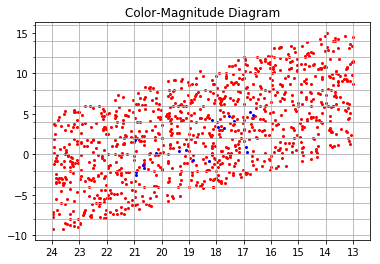

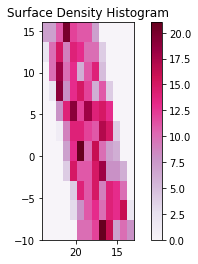

xedges =  [ 13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.]
yedges =  [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.]


In [37]:
# Calculate surface density as a function of color and magniude by making a 2D histogram and dividing by the area
# of the survey space

# Create a 2D histogram that creates evenly-spaced bins and counts the points in each bin
# H is the matrix with the number of points per bin
# xedges, yedges are the bounds of the bins
# H, xedges, yedges = np.histogram2d(x0, y0, bins=[5,5], normed=False)

# row = 5
# column = 5

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

# xedges =  [ 13.,  15.,  17.,   19.,  21., 24.]
# yedges =  [ -10.,  -5.,   0.,   5.,  11., 16.]

H, xedges, yedges = np.histogram2d(rmag_all, color_all, bins=(xedges,yedges), normed=False)
print("H:")
print(H)
print('-------')

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/25.
print("sd:")
print(sd)
print('-------')

# Scatter plot of points with bin lines drawn
fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag_survey, color_survey, s = 4, color='red')
plt.scatter(rmag_lrg, color_lrg, s = 4, color='blue')
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram")
plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
plt.imshow(H, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.title("Surface Density Histogram")
plt.show()

# Playing with only plotting one bin at a time. Not useful now but I don't want to forget it.
# dx = x[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]
# dy = y[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]

# plt.scatter(dx,dy)
# plt.show()

# print(H.shape)

# print(sd[0,0])
# print(sd[0,1])
# print(sd[1,0])
# print(sd[1,1])

print("xedges = ", xedges)
print("yedges = ", yedges)

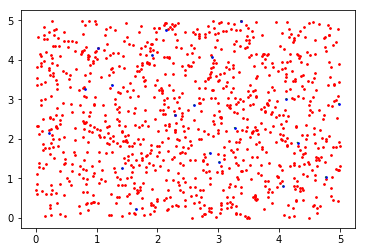

nn = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
nn index =  [array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64) array([], dtype=int64)
 array([], dtype=int64) array([], dtype=int64)]
total index array:  []
0
num is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
length of num is 20


In [38]:
# Counting near neighbors using KDTree
# Result is an array of the number of near neighbors each LRG has

# Plots LRG sources and EDR sources
plt.scatter(x1, y1, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')

# Draws circle of some radius around the LRG sources
# Circles too small to really see in the plot, but I have tested it with bigger radii to make sure it works if I
# ever need it.
circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), r[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
# zip_list0 = list(zip(x0, y0))
zip_list0 = list(zip(x0, y0)) # Fake LRG sources
zip_list1 = list(zip(x1, y1)) # Fake EDR sources
# print(type(zip_list))
# print(zip_list)
# print(zip_list0[0])

# Creates a tree of EDR sources
gal_tree = KDTree(zip_list1)

# returns a list of EDR sources that are within some radius r of an LRG
nn = gal_tree.query_radius(zip_list0,r=r,count_only=True)
print("nn =", nn)
# print("length of nn = ", len(nn))

# find indices of near neighbors
ind = gal_tree.query_radius(zip_list0,r=r)
# print("length of nn index = ", len(ind))
print("nn index = ", ind)
# print("index 0 =", ind[0])
# print("index 1 =", ind[1])
# print("index 2 =", ind[2])
# print("index 3 =", ind[3])
# print("index 4 =", ind[4])
# print("index 5 =", ind[5])
# print("index 6 =", ind[6])
# print("index 7 =", ind[7])
# print("index 8 =", ind[8])
# print("index 9 =", ind[9])

# print(type(ind[0]))
# print(type(ind))

total_ind = np.concatenate(ind)
print("total index array: ", total_ind)
print(len(total_ind))

# Array that gives actual number of near neighbors for every LRG
num = []

for i in range(len(ind)):
    num.append(len(ind[i]))

print("num is", num)
print("length of num is", len(num))

# print(type(ind))
# print(type(ind[0]))

In [30]:
# Create 2D histograms in bins of color and magnitude for near neighbors found above
# Result is a 2D array of the number of near neighbors for every LRG in bins of color and magnitude.

# Creates an empty near neighbor array to populate with zeros or with the values of the 2D histogram
Nn = [[[] for x in range(len(xedges))] for y in range(len(yedges))] 
print("Nn = ", Nn)

# Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
for i in range(len(ind)):
    if len(ind[i]) == 0:
        hist2d = np.zeros((len(xedges),len(yedges)))
        Nn = np.append(Nn, hist2d)
        print("list is empty")
#         print(hist2d)
    else:
        print(ind[i])
        hist2d, x_notuse, y_notuse = np.histogram2d(rmag_survey[ind[i]], color_survey[ind[i]], bins=[xedges, yedges], normed=False)
        Nn = np.append(Nn, hist2d)
        print(hist2d)
#     np.append(Nn, hist2d)
# np.append(Nn, hist2d)

# print("Nn = ", Nn)

# The above code creates one giant Nn array. The code below reshapes it into an array of arrays.
Nn = [Nn[i:i+(len(xedges)*len(yedges))] for i in range(0, len(Nn), (len(xedges)*len(yedges)))]
# print("reshaped Nn = ", Nn)
# print("")
# print("Nn0 is ", Nn[0])
# print("")
# print("Nn1 is ", Nn[1])
# print("")
# print("Nn2 is ", Nn[2])
# print("")
# print("Nn3 is ", Nn[3])
# print("")
# print("Nn4 is ", Nn[4])
# print("")
# print("Nn5 is ", Nn[5])
# print("")
# print("Nn6 is ", Nn[6])
# print("")
# print("Nn7 is ", Nn[7])
# print("")
# print("Nn8 is ", Nn[8])
# print("")
# print("Nn9 is ", Nn[9])
# print("")

# print("Nn = ", Nn)

# This bit here further reshapes each array in Nn into appropriately-sized 2D arrays of near neighbors as a function 
# of color and magnitude.

# I know there must be a better way to do this, but this hacky way is what I could manage.

near = []

for i in range(len(Nn)):
    near.append(np.reshape(Nn[i], (len(xedges),len(yedges))))
    
print("near = ", near)

# print("-------------")
# print(near[0])
# print("")
# print(near[1])
# print("")
# print(near[2])
# print("")
# print(near[3])
# print("")
# print(near[4])
# print("")
# print(near[5])
# print("")
# print(near[6])
# print("")
# print(near[7])
# print("")
# print(near[8])
# print("")
# print(near[9])
# print("")

Nn =  [[[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []], [[], [], [], [], [], [], [], [], [], [], [], []]]
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
list is empty
near =  [arra

In [16]:
# Make CMDs for LRG near neighbors

# First, make one CMD for one set of near neighbors 

# Magnitudes for survey sources
# for i in range(1000):
#     gmag_survey = [random.uniform(1,100) for j in range(100)]
#     rmag_survey = [random.uniform(1,100) for j in range(100)]
    
# print("length gmag_survey = ", len(gmag_survey))
# print("length rmag_survey = ", len(rmag_survey))
# print("gmag_survey = ", gmag_survey[0])
# print("rmag_survey = ", rmag_survey[0])

# ra = x1
# dec = y1
# index = []
# print("length ind = ", len(ind))

# for i in range(len(ind)):
#     index = ind[i]
#     index_full = []
# #     print("index = ", index)
# #     print(type(index))
#     for j in range(len(index)):
#         index_full.append(index[j])
#     print("index_full = ", index_full)
#     print("first index = ", index_full[0])
#     gmag_near = []
#     rmag_near = []
#     color = []
#     for k in range(len(index_full)):
#         gmag_near.append(gmag_survey[index_full[k]])
#         rmag_near.append(rmag_survey[index_full[k]])
#     print("length gmag = ", len(gmag_near))
#     print("length rmag = " , len(rmag_near))
#     color.append(np.array(gmag_near) - np.array(rmag_near))
#     plt.scatter(rmag_near, color, color = "teal")
#     plt.show()
    

# gmag_near0 = []
# rmag_near0 = []

# for i in range(len(ind0)):
#     gmag_near0.append(gmag_survey[ind0[i]])
#     rmag_near0.append(rmag_survey[ind0[i]])

# # print(gmag_near0)
# # print(rmag_near0)
# print(len(ind0))
# print(len(gmag_near0))
# print(len(rmag_near0))
# print(type(rmag_near0))

# gmag_near0 = np.array(gmag_near0)
# rmag_near0 = np.array(rmag_near0)

# color = gmag_near0 - rmag_near0

# plt.scatter(rmag_near0, color, color="teal")
# plt.show()

In [32]:
# Calculates number of interloper galaxies by first calculating the solid angle omega enclosed in radius r from 
# the LRG. Then find the number of interloper galaxies by multiplying omega by the surface density to find the 
# number of interloper galaxies as a function of color and magnitude.


# Calculate solid angle omega for every r
omega = []

for i in range(len(r)):
    ang = np.pi * (r[i]/2.)**2.
    omega.append(ang)

print("omega is", omega)
# print(type(omega))
# print(r[1]) 


# Multiply omega by the surface density
# Like the code above, this needs to be reshaped to make bins of color and magnitude.
Nbkg = []

for i in range(len(omega)):
    for j in range(len(xedges)):
        for k in range(len(yedges)):
            Nbkg.append(sd[j][k] * omega[i])
#     Nbkg.append(interlop)

# print("sd is", sd)
# print("sd cell (0,0) is", sd[0][0])
# print("omega0 is", omega[0])

# print("sd(0,0)*omega0 is", sd[0][0]*omega[0])
# print("sd(0,1)*omega0 is", sd[0][1]*omega[0])
# print("sd(1,0)*omega0 is", sd[1][0]*omega[0])
# print("sd(1,1)*omega0 is", sd[1][1]*omega[0])
# print("")
# print("sd(0,0)*omega1 is", sd[0][0]*omega[1])
# print("sd(0,1)*omega1 is", sd[0][1]*omega[1])
# print("sd(1,0)*omega1 is", sd[1][0]*omega[1])
# print("sd(1,1)*omega1 is", sd[1][1]*omega[1])
# print("")
# print("The length of Nbkg is", len(Nbkg))
# print("Nbkg array", Nbkg)
# print(Nbkg.shape)

# Reshape Nbkg into an array of arrays.
Nbkg = [Nbkg[i:i+(len(xedges)*len(yedges))] for i in range(0, len(Nbkg), (len(xedges)*len(yedges)))]

# print("The length of Nbkg is", len(Nbkg))
# print("Nbkg array", Nbkg)

# print("Nbkg0 is ", Nbkg[0])
# print("")
# print("Nbkg1 is ", Nbkg[1])
# print("")
# print("Nbkg2 is ", Nbkg[2])
# print("")
# print("Nbkg3 is ", Nbkg[3])
# print("")
# print("Nbkg4 is ", Nbkg[4])
# print("")
# print("Nbkg5 is ", Nbkg[5])
# print("")
# print("Nbkg6 is ", Nbkg[6])
# print("")
# print("Nbkg7 is ", Nbkg[7])
# print("")
# print("Nbkg8 is ", Nbkg[8])
# print("")
# print("Nbkg9 is ", Nbkg[9])

# This bit here further reshapes each array in Nn into appropriately-sized 2D arrays of interloper galaxies
# as a function of color and magnitude.

# I know there must be a better way to do this, but this hacky way is what I could manage.
interlop = []
for i in range(len(Nbkg)):
    interlop.append(np.reshape(Nbkg[i], (len(xedges),len(yedges))))
    
print("interlopers")
print(interlop)
    
# print("-------------")
# print(interlop[0])
# print("")
# print(interlop[1])
# print("")
# print(interlop[2])
# print("")
# print(interlop[3])
# print("")
# print(interlop[4])
# print("")
# print(interlop[5])
# print("")
# print(interlop[6])
# print("")
# print(interlop[7])
# print("")
# print(interlop[8])
# print("")
# print(interlop[9])
# print("")

omega is [1.4424981060694859e-05, 1.084270282949404e-05, 1.4605651964082822e-05, 6.265274627915953e-06, 2.1674635745003004e-05, 2.2014867643574547e-05, 1.6719542109303828e-05, 5.477719495640784e-06, 1.309121691691678e-05, 8.610575510244875e-06, 7.0685208277302834e-06, 2.6523549071065737e-05, 2.8144684524508376e-05, 3.7264523225807756e-06, 2.324826375368707e-05, 1.529364404881412e-05, 9.76694910392637e-06, 7.716474267227027e-06, 1.7348407346741994e-05, 1.1504837158679283e-05]


IndexError: index 13 is out of bounds for axis 0 with size 13

In [19]:
# Calculate number of satellite galaxies by subtracting interloper galaxies from near neighbor galaxies as a function 
# of color and magnitude.

# TRY NOT DOING THIS****

Nsat = np.array(near) - np.array(interlop)
print(sat)

# for i in range(len(near)):
#     sat = np.append(sat, [np.array(near[i]) - np.array(interlop[i])])

# sat = [sat[i:i+(row*column)] for i in range(0, len(sat), (row*column))]

# Nsat = []
# for i in range(len(sat)):
#     Nsat.append(np.reshape(sat[i], (row,column)))

# print("numsats0 is ", numsats[0])
# print("")
# print("numsats1 is ", numsats[1])
# print("")
# print("numsats2 is ", numsats[2])
# print("")
# print("numsats3 is ", numsats[3])
# print("")
# print("numsats4 is ", numsats[4])
# print("")
# print("numsats5 is ", numsats[5])
# print("")
# print("numsats6 is ", numsats[6])
# print("")
# print("numsats7 is ", numsats[7])
# print("")
# print("numsats8 is ", numsats[8])
# print("")
# print("numsats9 is ", numsats[9])

print(len(Nsat))
print(Nsat)
print(type(Nsat))
Nsat = np.array(Nsat)
print(type(Nsat))

[[[  0.00000000e+00  -1.10351105e-03  -9.44115010e-03   9.89931363e-01
    -7.73900234e-03]
  [  0.00000000e+00  -5.33724299e-03   9.89577951e-01  -1.03427114e-02
    -3.69279515e-03]
  [ -2.52437169e-04  -9.31853777e-03   9.89989063e-01  -8.48910135e-03
    -3.31774564e-04]
  [ -3.95965730e-03  -9.80898712e-03  -1.00902743e-02  -5.06316835e-03
     0.00000000e+00]
  [ -8.05635192e-03  -1.01623992e-02  -9.50606252e-03  -1.19727343e-03
     0.00000000e+00]]

 [[  0.00000000e+00  -8.29466766e-04  -7.09654900e-03  -7.56820657e-03
    -5.81711007e-03]
  [  0.00000000e+00  -4.01180005e-03  -7.83385279e-03  -7.77421793e-03
    -2.77573192e-03]
  [ -1.89747300e-04  -7.00438603e-03   9.92475164e-01  -6.38093062e-03
    -2.49382165e-04]
  [ -2.97632193e-03  -7.37303792e-03  -7.58447063e-03  -3.80578869e-03
     0.00000000e+00]
  [ -6.05564953e-03  -7.63868414e-03   9.92854659e-01  -8.99944335e-04
     0.00000000e+00]]

 [[  0.00000000e+00  -1.11733238e-03   9.90440601e-01  -1.01947451e-02
    -

In [20]:
# Here I want to calculate a mean Nsat in bins of projected radius

# This is where I'm not sure I'm doing things correctly. I intend to calculate the mean of satellite galaxies binned
# by radius from LRG. In this test, I split the r into three bins and added each 2D array together cell-wise and 
# divided by the number of arrays in that r bin to get a 2D array of averages.

r = np.array(r)
print("r = ", r)
# print(type(r))

# Split r into three bins

Nsat_low_r = sat[np.where((r >= 0.002) & (0.0035 >= r))]

Nsat_med_r = sat[np.where((r > 0.0035) & (0.005 >= r))]

Nsat_high_r = sat[np.where((r > 0.005) & (0.006 >= r))]

# Calculate averages for three radius bins
s_low = 0.
for i in range(len(Nsat_low_r)):
    s_low += Nsat_low_r[i]
    
r_avg_low = s_low / len(Nsat_low_r)
print("Average for (r >= 0.002) & (0.0035 >= r)")
print(r_avg_low)

print("---------")

s_med = 0.
for i in range(len(Nsat_med_r)):
    s_med += Nsat_med_r[i]
    
r_avg_med = s_med / len(Nsat_med_r)
print("Average for (r > 0.0035) & (0.005 >= r)")
print(r_avg_med)

print("---------")

s_high = 0.
for i in range(len(Nsat_high_r)):
    s_high += Nsat_high_r[i]
    
r_avg_high = s_high / len(Nsat_high_r)
print("Average for (r > 0.005) & (0.006 >= r)")
print(r_avg_high)

r =  [ 0.00428561  0.00371556  0.00431237  0.00282439  0.00525329  0.00529436
  0.00461389  0.00264092  0.00408268  0.00331109  0.00299999  0.00581127
  0.00598623  0.00217823  0.00544064  0.00441276  0.00352642  0.00313447
  0.00469986  0.00382732]
Average for (r >= 0.002) & (0.0035 >= r)
[[  0.00000000e+00  -4.95528967e-04  -4.23952561e-03  -4.52129698e-03
   -3.47518027e-03]
 [  0.00000000e+00  -2.39667605e-03  -4.67999580e-03  -4.64436954e-03
   -1.65824073e-03]
 [ -1.13356300e-04  -4.18446684e-03  -4.49538697e-03   1.62854656e-01
   -1.48982565e-04]
 [  1.64888592e-01   1.62261965e-01   1.62135653e-01   1.64393063e-01
    0.00000000e+00]
 [  1.63048981e-01  -4.56340075e-03  -4.26867437e-03  -5.37632736e-04
    0.00000000e+00]]
---------
Average for (r > 0.0035) & (0.005 >= r)
[[  0.00000000e+00   1.10060529e-01   1.02122795e-01   4.34858738e-01
    1.03743301e-01]
 [  0.00000000e+00   1.06029863e-01   2.12300055e-01   2.12375587e-01
    1.07595437e-01]
 [ -2.40329313e-04  -8.87158

In [21]:
# Basically the same thing as above, except with redshift

z = np.array(z)
print("z = ", z)
# print(type(z))

# Use 0 < z <= 0.5, 0.5 < z <= 1

# 0 <= r <= 0.5
Nsat_low_z = Nsat[np.where((z >= 0.1) & (0.25 >= z))]

# 0.5 < r <= 1.
Nsat_high_z = Nsat[np.where((z > 0.25) & (0.5 >= z))]


# Calculate averages for three radius bins
s_low = 0.
for i in range(len(Nsat_low_z)):
    s_low += Nsat_low_z[i]
    
z_avg_low = s_low / len(Nsat_low_z)
print("Average for 0 <= z <= 0.5")
print(z_avg_low)

print("---------")

s_high = 0.
for i in range(len(Nsat_high_z)):
    s_high += Nsat_high_z[i]
    
z_avg_high = s_high / len(Nsat_high_z)
print("Average for 0.5 < z < 1")
print(z_avg_high)

z =  [ 0.32856104  0.27155562  0.33123652  0.18243929  0.4253285   0.42943555
  0.36138901  0.16409182  0.30826774  0.23110912  0.19999867  0.48112676
  0.4986228   0.11782255  0.44406441  0.34127624  0.25264239  0.21344729
  0.36998594  0.28273246]
Average for 0 <= z <= 0.5
[[  0.00000000e+00  -4.95528967e-04  -4.23952561e-03  -4.52129698e-03
   -3.47518027e-03]
 [  0.00000000e+00  -2.39667605e-03  -4.67999580e-03  -4.64436954e-03
   -1.65824073e-03]
 [ -1.13356300e-04  -4.18446684e-03  -4.49538697e-03   1.62854656e-01
   -1.48982565e-04]
 [  1.64888592e-01   1.62261965e-01   1.62135653e-01   1.64393063e-01
    0.00000000e+00]
 [  1.63048981e-01  -4.56340075e-03  -4.26867437e-03  -5.37632736e-04
    0.00000000e+00]]
---------
Average for 0.5 < z < 1
[[  0.00000000e+00   7.00887071e-02   5.99652875e-02   4.16346261e-01
    2.76317721e-01]
 [  0.00000000e+00   6.49481818e-02   2.01631440e-01   2.01727770e-01
    6.69448424e-02]
 [ -3.06504917e-04  -1.13144101e-02   4.16416319e-01   2.75

In [22]:
# Add up all the satellites in each projected radius bin and plot the distribution

# Again, I'm not quite sure I'm hitting on what Greg wants. I intend to find the total number of satellites as a
# function of projected radius. So what I did was keep the r bins from above and added up each cell until I had one
# number per radius bin.

Nsat_tot_low_r = np.sum(Nsat_low_r)
Nsat_tot_med_r = np.sum(Nsat_med_r)
Nsat_tot_high_r = np.sum(Nsat_high_r)

# totals = np.array([Nsat_tot_low_r, Nsat_tot_med_r, Nsat_tot_high_r])
# totals = np.array([3, 5, 7])

print("Total Nsat (low r)")
print(Nsat_tot_low_r)
print("")
print("Total Nsat (med r)")
print(Nsat_tot_med_r)
print("")
print("Total Nsat (high r)")
print(Nsat_tot_high_r)
print("")


Total Nsat (low r)
5.61096117932

Total Nsat (med r)
21.7627846953

Total Nsat (high r)
18.7827239326

